In [4]:
N = ord("B") % 3 + 1  # "B" is the first letter of my name
print(f"Variant number is: {N}")

Variant number is: 1


In [13]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Task 1
def get_column_values(filename, column_name):
   
    df = pd.read_csv(filename)
    return np.array(df[column_name], dtype=int)

# Example usage:
filename = 'C:\\Users\\YusufGokhan\\Python\\Lab2\\archive\\russia_losses_equipment.csv'
aircraft_array = get_column_values(filename, "aircraft")  # Correct variable name




In [14]:
# Task 2: Create a numpy array from the "aircraft" column.
# The numpy array for "aircraft" column is created using Task 1
print("Aircraft data as numpy array:")
print(aircraft_array)


Aircraft data as numpy array:
[369 369 369 369 369 369 369 369 369 369 369 369 369 369 369 369 369 369
 368 368 368 368 368 368 368 368 368 368 368 368 368 368 368 367 367 367
 367 367 367 367 367 367 367 367 367 367 366 366 366 366 366 366 366 365
 365 365 363 363 363 363 363 363 363 363 363 363 363 363 362 362 362 362
 361 361 361 361 361 361 361 361 361 361 361 361 360 360 360 360 360 360
 360 360 360 360 359 359 359 359 359 359 359 359 359 359 359 359 359 359
 359 359 359 358 357 357 357 357 357 357 357 357 357 357 357 357 357 357
 357 356 356 355 354 354 354 354 354 353 351 351 351 350 350 349 349 349
 349 349 349 349 348 348 348 348 348 348 348 348 348 348 348 348 348 348
 348 347 347 347 347 347 347 347 347 347 347 347 347 347 347 347 347 347
 347 347 347 347 347 347 347 347 347 347 347 347 347 347 347 347 347 347
 347 347 347 347 347 347 347 347 347 347 347 347 347 346 345 342 342 340
 340 340 340 339 339 338 338 336 335 332 332 332 332 332 332 332 332 332
 332 332 332 332 332 

In [15]:
# Task 3: Find daily aircraft losses.
def daily_losses(losses_array):
   
    return np.diff(losses_array, prepend=losses_array[0])

daily_aircraft_losses = daily_losses(aircraft_array)
print("Daily aircraft losses:")
print(daily_aircraft_losses)

Daily aircraft losses:
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  -1   0   0   0   0   0   0   0   0   0   0   0   0   0   0  -1   0   0
   0   0   0   0   0   0   0   0   0   0  -1   0   0   0   0   0   0  -1
   0   0  -2   0   0   0   0   0   0   0   0   0   0   0  -1   0   0   0
  -1   0   0   0   0   0   0   0   0   0   0   0  -1   0   0   0   0   0
   0   0   0   0  -1   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0  -1  -1   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  -1   0  -1  -1   0   0   0   0  -1  -2   0   0  -1   0  -1   0   0
   0   0   0   0  -1   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  -1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  -1  -1  -3   0  -2
   0   0   0  -1   0  -1   0  -2  -1  -3   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0

In [16]:
# Task 4: Find the 3 greatest daily losses of aircrafts.
def top_n_losses(losses_array, n=3):
    return np.sort(losses_array)[-n:]

top_3_losses = top_n_losses(daily_aircraft_losses)
print(f"Top 3 daily losses: {top_3_losses}")

Top 3 daily losses: [0 0 1]


In [17]:
# Task 5: Determine how many aircrafts were shot down in the summer of 2024.
def losses_in_summer_2024(filename):
    
    df = pd.read_csv(filename)
    df['date'] = pd.to_datetime(df['date'])
    
    # Filter data for summer 2024
    summer_2024 = df[(df['date'] >= '2024-06-01') & (df['date'] <= '2024-08-31')]
    total_losses = summer_2024['aircraft'].iloc[-1] - summer_2024['aircraft'].iloc[0]
    
    return total_losses

summer_2024_losses = losses_in_summer_2024(filename)
print(f"Aircraft losses in the summer of 2024: {summer_2024_losses}")


Aircraft losses in the summer of 2024: -11


In [18]:
# Task 6: Find the mean value of aircraft losses in the last 300 days of war.
def mean_last_300_days(losses_array):
    return np.mean(losses_array[-300:])

mean_losses_300_days = mean_last_300_days(daily_aircraft_losses)
print(f"Mean aircraft losses in the last 300 days: {mean_losses_300_days}")

Mean aircraft losses in the last 300 days: -0.91


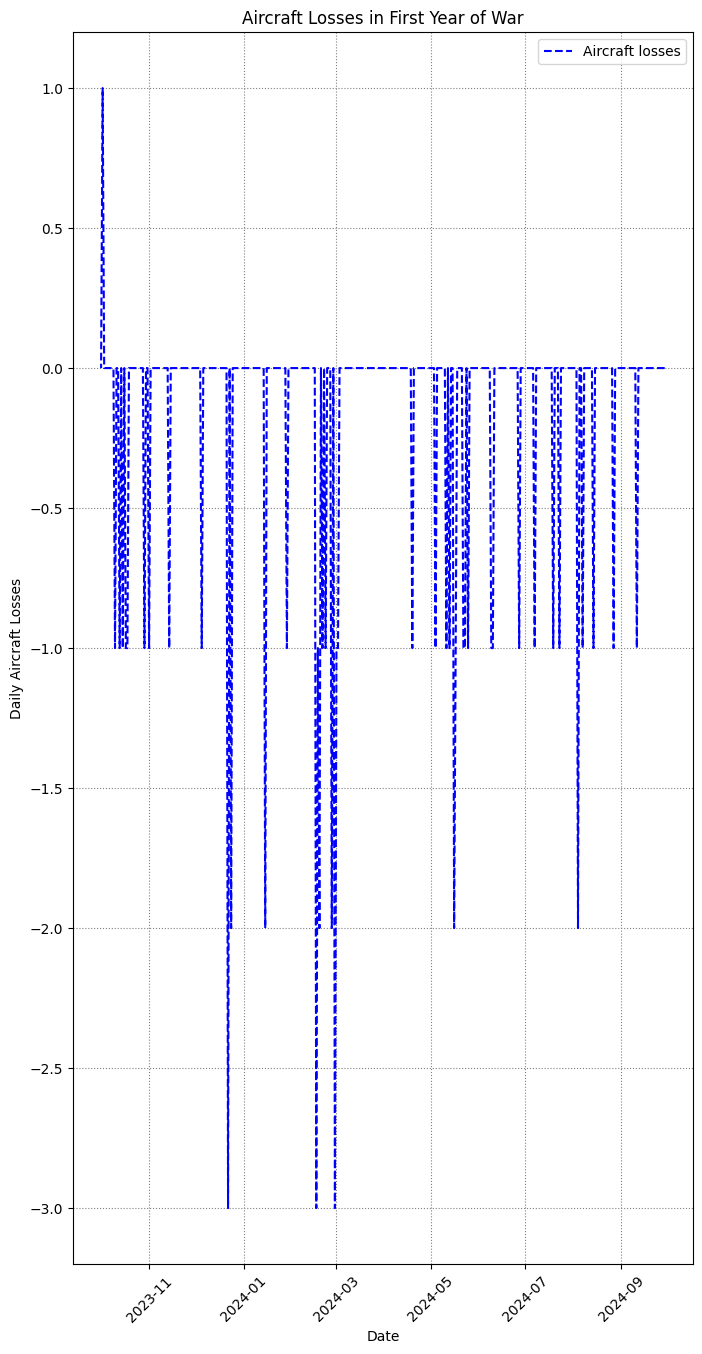

In [19]:

# Task 7: Plot aircraft losses for the first year of war.
def plot_aircraft_losses(dates, losses_array):
    plt.figure(figsize=(8, 16), dpi=100)
    plt.plot(dates[:365], losses_array[:365], linestyle='--', color='blue', label='Aircraft losses')
    
    plt.title("Aircraft Losses in First Year of War")
    plt.xlabel("Date")
    plt.ylabel("Daily Aircraft Losses")
    
    plt.grid(True, which='both', linestyle=':', color='gray')
    plt.legend()
    plt.xticks(rotation=45)
    
    # Save the plot
    plt.savefig("aircraft_losses_first_year.png")
    plt.show()

# Example usage for Task 7
df = pd.read_csv(filename)
df['date'] = pd.to_datetime(df['date'])
plot_aircraft_losses(df['date'], daily_aircraft_losses)
